In [1]:
from pycalphad import Database, Model, variables as v
dbf = Database('CuZnFeCl-Viitala (1).dat')

LIQUIDSOLN
CUCL
FEZNSOLN
ZNFESOLN
CL2(G)
FE_BCC(S)
CU_SOLID(S)
ZN_SOLID(S)
PB_SOLID(S)
CUCL(S)
CUCL2(S)
ZNCL2(S)
FECL3(S)
FECL2(S)
PBCL2(S)


In [2]:
# some global variables for convinence later
ZN =  v.Species('ZN/+2.0')
FE2 = v.Species('FE/+2.0')
FE3 = v.Species('FE/+3.0')
CL =  v.Species('CL/+1.0')
CU1 = v.Species('CU/+1.0')
CU2 = v.Species('CU/+2.0')

# we pass in our Model subclass to this function and it will compare the
# energies with values I got from Jorge
def check(M: Model):
    
    ##################################################################
    # FIRST CHECK: FE+2, FE+3, ZN, CL
    ##################################################################
    # values from fecuclEntropy6
    mod = M(dbf, ['FE', 'ZN', 'CL'], 'LIQUIDSOLN')

    subs_dict = {mod._p(ZN,ZN,CL,CL): 0.23035428056642213, mod._p(FE3,FE3,CL,CL): 0.23035428056641782, mod._p(FE2,FE2,CL,CL): 4.2058493520169402E-029, mod._p(ZN,FE3,CL,CL): 0.53929143886714892, mod._p(ZN,FE2,CL,CL): 5.3823238023259126E-015, mod._p(FE3,FE2,CL,CL): 5.5450524767183087E-015}
    subs_dict[v.T] = 1400.0
    
    print()
    print('FE+2, FE+3, ZN, CL')
    F = float((mod.models['ref']*mod.normalization).subs(subs_dict))
    print('GM ref pycalphad', F)
    print('sum(ξ)', Float(mod._ξ.subs(subs_dict)))
    print('sum(ϑ_A)', sum(mod.ϑ(dbf, sp) for sp in mod.cations).subs(subs_dict))    
    print('sum(ϑ_X)', sum(mod.ϑ(dbf, sp) for sp in mod.anions).subs(subs_dict))    
    print('sum(w_A)', sum(mod.w(sp) for sp in mod.cations).subs(subs_dict))
    print('sum(w_X)', sum(mod.w(sp) for sp in mod.anions).subs(subs_dict))
    n = 12.000
    G = -2.97049E+06
    S = 22.744228858354514
    xs = -1356.0429785729693  # (sum p_ABXY*xs_i from Thermochimica output)
    GM_tot_TC = G/n
    TSM = -S*subs_dict[v.T]/n
    GM_srf = GM_tot_TC - TSM - xs
    print('thermochimica GM = G/n', GM_tot_TC)
    print('thermochimica T*SM = T*S/n', TSM)
    print('thermochimica XS', xs)
    print('thermochimica GM_srf = GM + T*SM - XS', GM_srf)
    print(f'pct error {(GM_srf-F)/GM_srf*100:0.2e}%')
    TSM_pycalphad = float((mod.models['idmix']*mod.normalization).subs(subs_dict))
    print('T*SM (GM_config) pycalphad', TSM_pycalphad)
    print('SM: pycalphad/Thermochimica ratio', TSM_pycalphad/TSM)
    print(f'SM: error {(TSM-TSM_pycalphad)/TSM*100:0.2e}%')


    ##################################################################
    # SECOND CHECK: FE+3, ZN, CL
    ##################################################################

    mod = M(dbf, ['FE', 'ZN', 'CL'], 'LIQUIDSOLN')

    subs_dict = {
        mod._p(ZN,ZN,CL,CL): 0.17255547095806262,
        mod._p(FE3,FE3,CL,CL): 0.17255547095805654,
        mod._p(FE3,ZN,CL,CL): 0.65488905808386533,
    # FE2, generated automatically
        mod._p(FE2,FE2,CL,CL): 1e-20, # 0.0,
        mod._p(FE2,ZN,CL,CL): 1e-20, # 0.0,
        mod._p(FE2,FE3,CL,CL): 1e-20, # 0.0,
        v.T: 600
    }

    print()
    print('FE+3, ZN, CL')
    F = float((mod.models['ref']*mod.normalization).subs(subs_dict))
    print('GM', F)
    print('sum(ξ)', Float(mod._ξ.subs(subs_dict)))
    print('sum(ϑ_A)', sum(mod.ϑ(dbf, sp) for sp in mod.cations).subs(subs_dict))    
    print('sum(ϑ_X)', sum(mod.ϑ(dbf, sp) for sp in mod.anions).subs(subs_dict))
    print('sum(w_A)', sum(mod.w(sp) for sp in mod.cations).subs(subs_dict))
    print('sum(w_X)', sum(mod.w(sp) for sp in mod.anions).subs(subs_dict))
    G_end_thermochimica=-164584.5209
    print('thermochimica', G_end_thermochimica)
    print('ratio', F/G_end_thermochimica)
#     TSM_pycalphad = float(mod.models['idmix'].subs(subs_dict))
#     print('T*SM (GM_config) pycalphad', TSM_pycalphad)
#     print('pycalphad/Thermochimica ratio', TSM_pycalphad/TSM)


    x_Cu1_Cu1_Cl_Cl=0.004334957
    x_Zn_Zn_Cl_Cl=0.005390651
    x_fe2_fe2_Cl_Cl=0.272035078
    x_Cu1_Zn_Cl_Cl=0.595642804
    x_Cu1_fe2_Cl_Cl=0.062353949
    x_Zn_fe2_Cl_Cl=0.060242562

    ##################################################################
    # THIRD CHECK: CU+1, FE+3, ZN, CL
    ##################################################################
    mod = M(dbf, ['CU', 'FE', 'ZN', 'CL'], 'LIQUIDSOLN')

    subs_dict = {
        mod._p(CU1,CU1,CL,CL): x_Cu1_Cu1_Cl_Cl,  # 6 6 6 6
        mod._p(ZN,ZN,CL,CL): x_Zn_Zn_Cl_Cl,  # 6 6 3 3
        mod._p(FE2,FE2,CL,CL): x_fe2_fe2_Cl_Cl,  # 
        mod._p(CU1,ZN,CL,CL): x_Cu1_Zn_Cl_Cl,  # 6 6 3 3
        mod._p(CU1,FE2,CL,CL): x_Cu1_fe2_Cl_Cl,
        mod._p(ZN,FE2,CL,CL): x_Zn_fe2_Cl_Cl,
        # FE3, automatically generated
        mod._p(FE3,CU1,CL,CL): 0.0,
        mod._p(FE3,CU2,CL,CL): 0.0,
        mod._p(FE3,FE2,CL,CL): 0.0,
        mod._p(FE3,FE3,CL,CL): 0.0,
        mod._p(FE3,ZN,CL,CL): 0.0,
        # CU2, automatically generated
        mod._p(CU2,CU1,CL,CL): 0.0,
        mod._p(CU2,CU2,CL,CL): 0.0,
        mod._p(CU2,FE2,CL,CL): 0.0,
        mod._p(CU2,FE3,CL,CL): 0.0,
        mod._p(CU2,ZN,CL,CL): 0.0,

        v.T: 600
    }

    print()
    print('FE+3, ZN, CU+1, CL')
    F = float((mod.models['ref']*mod.normalization).subs(subs_dict))
    print('GM', F)
    print('sum(ξ)', Float(mod._ξ.subs(subs_dict)))
    print('sum(ϑ_A)', sum(mod.ϑ(dbf, sp) for sp in mod.cations).subs(subs_dict))    
    print('sum(ϑ_X)', sum(mod.ϑ(dbf, sp) for sp in mod.anions).subs(subs_dict))
    print('sum(w_A)', sum(mod.w(sp) for sp in mod.cations).subs(subs_dict))
    print('sum(w_X)', sum(mod.w(sp) for sp in mod.anions).subs(subs_dict))
    G_end_thermochimica=-121248.96589888466
    print('thermochimica', G_end_thermochimica)
    print('ratio', F/G_end_thermochimica)
#     TSM_pycalphad = float(mod.models['idmix'].subs(subs_dict))
#     print('T*SM (GM_config) pycalphad', TSM_pycalphad)
#     print('pycalphad/Thermochimica ratio', TSM_pycalphad/TSM)


    ##################################################################
    # FOURTH CHECK: CU+1, CU+2, FE+2, FE+3, CL
    ##################################################################
    # values from fecuclEntropy5

    mod = M(dbf, ['CU', 'FE', 'CL'], 'LIQUIDSOLN')

    subs_dict = {
        mod._p(CU1,CU1,CL,CL): 0.18639,
        mod._p(FE3,FE3,CL,CL): 0.18774,
        mod._p(CU2,CU2,CL,CL): 3.9128E-03,
        mod._p(FE2,FE2,CL,CL): 4.1105E-03,
        mod._p(CU1,FE3,CL,CL): 0.39305,
        mod._p(CU1,CU2,CL,CL): 5.4011E-02,
        mod._p(FE3,CU2,CL,CL): 5.4207E-02,
        mod._p(CU1,FE2,CL,CL): 5.5359E-02,
        mod._p(FE3,FE2,CL,CL): 5.2463E-02,
        mod._p(CU2,FE2,CL,CL): 8.7574E-03,
        v.T: 1500.0,
    }
    
    print()
    print('CU+1, CU+2, FE+2, FE+3, CL')
    F = float((mod.models['ref']*mod.normalization).subs(subs_dict))
    print('GM pycalphad', F)
    print('sum(ξ)', Float(mod._ξ.subs(subs_dict)))
    print('sum(ϑ_A)', sum(mod.ϑ(dbf, sp) for sp in mod.cations).subs(subs_dict))    
    print('sum(ϑ_X)', sum(mod.ϑ(dbf, sp) for sp in mod.anions).subs(subs_dict))
    print('sum(w_A)', sum(mod.w(sp) for sp in mod.cations).subs(subs_dict))
    print('sum(w_X)', sum(mod.w(sp) for sp in mod.anions).subs(subs_dict))
    n = 6.00
    GM_tot_TC = -1.20328E+06/n
    xs = (0.18638859733042515* 1047.9743742916119 + 0.18773870155235334* -1047.9743742916198 + 3.9128150141439257E-003* 0.0000000000000000 + 4.1105131679501587E-003* 0.0000000000000000 + 0.39305175692065220* -615.49999999999523 + 5.4011261866982928E-002* 523.98718714580605 + 5.4206523968473794E-002* -523.98718714580991 + 5.5358930036604442E-002* 523.98718714580605 + 5.2463459491250738E-002* 191.01281285419051 + 8.7574406511634218E-003* -1095.6900000000001)
    S = 17.767509309103961
    TSM = -S*subs_dict[v.T]/n
    GM_srf = GM_tot_TC - TSM - xs
    print('thermochimica GM = G/n', GM_tot_TC)
    print('thermochimica T*SM = T*S/n', TSM)
    print('thermochimica XS', xs)
    print('thermochimica GM_srf = GM + T*SM - XS', GM_srf)
    print(f'pct error {(GM_srf-F)/GM_srf*100:0.2e}%')
    TSM_pycalphad = float((mod.models['idmix']*mod.normalization).subs(subs_dict))
    print('T*SM (GM_config) pycalphad', TSM_pycalphad)
    print('SM: pycalphad/Thermochimica ratio', TSM_pycalphad/TSM)
    print(f'SM: error {(TSM-TSM_pycalphad)/TSM*100:0.2e}%')



    ##################################################################
    # FIFTH CHECK: CU+1, CU+2, FE+2, FE+3, ZN, CL
    ##################################################################
    # values from fecuclEntropy4.1, but at T=600
    mod = M(dbf, ['CU', 'FE', 'ZN', 'CL'], 'LIQUIDSOLN')


    subs_dict = {
        mod._p(CU1,CU1,CL,CL): 0.39388370325165145,
        mod._p(ZN,ZN,CL,CL): 1.7809817952014279E-002,
        mod._p(FE3,FE3,CL,CL): 8.9490438154327792E-030,
        mod._p(CU2,CU2,CL,CL): 3.2756639052575473E-033,
        mod._p(FE2,FE2,CL,CL): 6.2359794924854356E-002,
        mod._p(CU1,ZN,CL,CL): 0.15066627372118871,
        mod._p(CU1,FE3,CL,CL): 1.2455945499189877E-015,
        mod._p(ZN,FE3,CL,CL): 6.9899709729658437E-016,
        mod._p(CU1,CU2,CL,CL): 2.5105714911928417E-017,
        mod._p(ZN,CU2,CL,CL): 5.1340202303467041E-018,
        mod._p(FE3,CU2,CL,CL): 3.4242698382447720E-031,
        mod._p(CU1,FE2,CL,CL): 0.31156631977550636,
        mod._p(ZN,FE2,CL,CL): 6.3714090374782179E-002,
        mod._p(FE3,FE2,CL,CL): 6.6419313777817551E-016,
        mod._p(CU2,FE2,CL,CL): 1.2518234424473305E-017,
        v.T: 600,
    }
    
    print()
    print('CU+1, CU+2, FE+2, FE+3, ZN, CL')
    F = float((mod.models['ref']*mod.normalization).subs(subs_dict))
    print('GM pycalphad', F)
    print('sum(ξ)', Float(mod._ξ.subs(subs_dict)))
    print('sum(ϑ_A)', sum(mod.ϑ(dbf, sp) for sp in mod.cations).subs(subs_dict))    
    print('sum(ϑ_X)', sum(mod.ϑ(dbf, sp) for sp in mod.anions).subs(subs_dict))
    print('sum(w_A)', sum(mod.w(sp) for sp in mod.cations).subs(subs_dict))
    print('sum(w_X)', sum(mod.w(sp) for sp in mod.anions).subs(subs_dict))
    n = 24.00
    GM_tot_TC = -2.31549E+06/n
    xs = (0.39388370325164612* -60.095537431351921 +   1.7809817952014362E-002* -449.74734129326788 +   8.2409015542562294E-030* 1.8138607300144949E-010 +   3.0164590016337925E-033* 0.0000000000000000 +   6.2359794924856035E-002* 0.0000000000000000 +  0.15066627372118810* 273.79259275775820 +   1.9204283123245371E-015* 259.99999999998488 +   1.0776972458399492E-015* -4775.9999999996608 +   3.8707399390004397E-017* 1.6023540907528861E-026 +   7.9155113578531588E-018* 0.0000000000000000 +   3.1533056734110195E-031* -4.9301235633995557E-012 +  0.31156631977550842* 1.6023540907528861E-026 +   6.3714090374783108E-002* 0.0000000000000000 +   1.0240373215536529E-015* -1170.5000000000048 +   1.9300318721279151E-017* -1095.6900000000001)
    S = 59.826574952731427
    TSM = -S*subs_dict[v.T]/n
    GM_srf = GM_tot_TC - TSM - xs
    print('thermochimica GM = G/n', GM_tot_TC)
    print('thermochimica T*SM = T*S/n', TSM)
    print('thermochimica XS', xs)
    print('thermochimica GM_srf = GM + T*SM - XS', GM_srf)
    print(f'pct error {(GM_srf-F)/GM_srf*100:0.2e}%')
    TSM_pycalphad = float((mod.models['idmix']*mod.normalization).subs(subs_dict))
    print('T*SM (GM_config) pycalphad', TSM_pycalphad)
    print('SM: pycalphad/Thermochimica ratio', TSM_pycalphad/TSM)
    print(f'SM: error {(TSM-TSM_pycalphad)/TSM*100:0.2e}%')


    ##################################################################
    # SIXTH CHECK: CU+1, CU+2, FE+2, FE+3, ZN, CL
    ##################################################################
    # values from fecuclEntropy4
    mod = M(dbf, ['CU', 'FE', 'ZN', 'CL'], 'LIQUIDSOLN')

    
    subs_dict = {mod._p(CU1,CU1,CL,CL): 0.38716794898632167, mod._p(ZN,ZN,CL,CL): 1.4334300784846300E-002, mod._p(FE3,FE3,CL,CL): 5.8895217108168152E-030, mod._p(CU2,CU2,CL,CL): 4.4109652550080943E-032, mod._p(FE2,FE2,CL,CL): 6.3776391893019382E-002, mod._p(CU1,ZN,CL,CL): 0.16227414212185229, mod._p(CU1,FE3,CL,CL): 2.0450391799201881E-015, mod._p(ZN,FE3,CL,CL): 6.4853293418246131E-016, mod._p(CU1,CU2,CL,CL): 2.0312800095143350E-016, mod._p(ZN,CU2,CL,CL): 3.8278770702259116E-017, mod._p(FE3,CU2,CL,CL): 1.0193816877897979E-030, mod._p(CU1,FE2,CL,CL): 0.31338995990550139, mod._p(ZN,FE2,CL,CL): 5.9057256308454924E-002, mod._p(FE3,FE2,CL,CL): 9.0197300115606599E-016, mod._p(CU2,FE2,CL,CL): 9.0261753183591896E-017}
    subs_dict[v.T] = 1501.0
    
    print()
    print('CU+1, CU+2, FE+2, FE+3, ZN, CL')
    F = float((mod.models['ref']*mod.normalization).subs(subs_dict))
    print('GM pycalphad', F)
    print('sum(ξ)', Float(mod._ξ.subs(subs_dict)))
    print('sum(ϑ_A)', sum(mod.ϑ(dbf, sp) for sp in mod.cations).subs(subs_dict))    
    print('sum(ϑ_X)', sum(mod.ϑ(dbf, sp) for sp in mod.anions).subs(subs_dict))
    print('sum(w_A)', sum(mod.w(sp) for sp in mod.cations).subs(subs_dict))
    print('sum(w_X)', sum(mod.w(sp) for sp in mod.anions).subs(subs_dict))
    n = 24.00
    G = -3.86006E+06
    S = 59.822229650963202
    xs = -262.2544482269833
    GM_tot_TC = G/n
    TSM = -S*subs_dict[v.T]/n
    GM_srf = GM_tot_TC - TSM - xs
    print('thermochimica GM = G/n', GM_tot_TC)
    print('thermochimica T*SM = T*S/n', TSM)
    print('thermochimica XS', xs)
    print('thermochimica GM_srf = GM + T*SM - XS', GM_srf)
    print(f'pct error {(GM_srf-F)/GM_srf*100:0.2e}%')
    TSM_pycalphad = float((mod.models['idmix']*mod.normalization).subs(subs_dict))
    print('T*SM (GM_config) pycalphad', TSM_pycalphad)
    print('SM: pycalphad/Thermochimica ratio', TSM_pycalphad/TSM)
    print(f'SM: error {(TSM-TSM_pycalphad)/TSM*100:0.2e}%')


    # for thermochimica output:
    # Gibbs energy of input/(moles liquid) - T*(Configurational entropy of phase Liquidsoln) - (sum(y_i, xs_i))


In [3]:
from pycalphad import Model
from sympy import S, log, Piecewise, And
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from pycalphad.core.utils import unpack_components
from tinydb import where
import itertools
from functools import partial
# These imports will require a development version of pycalphad on the cs_dat_support_linear branch
from pycalphad.io.cs_dat import quasichemical_quadruplet_species, quasichemical_pair_species, rename_element_charge, get_species
from pycalphad.core.constraints import is_multiphase_constraint


# Subclasses Model, so we get all behavior of pycalphad.Model methods unless we override them. 
class ModelMQMQA(Model):
    contributions = [('ref', 'reference_energy'), 
                    # don't build these contributions yet:
                     ('idmix', 'ideal_mixing_energy'),
#                      ('xsmix', 'excess_mixing_energy'),
#                      ('mag', 'magnetic_energy'),
    ]
    
    def __init__(self, dbe, comps, phase_name, parameters=None):
        # Here we do some custom initialization before calling
        # `Model.__init__` via `super()`, which does the initialization and
        # builds the phase as usual.
        
        # build `constituents` here so we can build the pairs and quadruplets
        # *before* `super().__init__` calls `self.build_phase`. We leave it to
        # the Model to build self.constituents and do the error checking.
        active_species = unpack_components(dbe, comps)
        constituents = []
        for sublattice in dbe.phases[phase_name].constituents:
            sublattice_comps = set(sublattice).intersection(active_species)
            constituents.append(sublattice_comps)

        # create self.cations and self.anions properties to use instead of constituents
        self.cations = sorted(constituents[0])
        self.anions = sorted(constituents[1])

        # pairs and quads are defined here so we can use them in `self.build_phase`
        self.pairs = quasichemical_pair_species(*[[s.name for s in subl] for subl in constituents])
        self.quads = quasichemical_quadruplet_species(*[[s.name for s in subl] for subl in constituents])
        
        # Call Model.__init__, which will build the Gibbs energy from the contributions list.
        super().__init__(dbf, comps, phase_name, parameters=parameters)
        
        # In several places we use the assumption that the cation lattice and anion lattice have no common species
        # we validate that assumption here
        shared_species = set(self.cations).intersection(set(self.anions))
        assert len(shared_species) == 0, f"No species can be shared between the two MQMQA lattices, got {shared_species}"
        
        # pycalphad now expects the `constituents` to refer to the constituents w.r.t. the Gibbs energy and internal DOF, not the phase constituents
        # we fix that here.
        self.constituents = [sorted(self.quads)]
    
    def _pair_AX(self, pair: v.Species):
        """Extract A and X from a pair Species"""
        # assumes that, for both cases, c is exclusive to As or Xs
        A = [v.Species(c) for c in pair.constituents.keys() if v.Species(c) in self.cations][0]
        X = [v.Species(c) for c in pair.constituents.keys() if v.Species(c) in self.anions][0]
        return A, X
    
    def _p(self, *ABXYs: v.Species) -> v.SiteFraction:
        """Shorthand for creating a site fraction object v.Y for a quadruplet.
        
        The name `p` is intended to mirror construction of `p(A,B,X,Y)`
        quadruplets, following Sundman's notation.
        """
        return v.Y(self.phase_name, 0, get_species(*[s.name for s in ABXYs]))
    
    def _pair_test(self, constituent_array):
        """Return True if the constituent array matches a pair endmember"""
        if len(constituent_array) > 1:
            return False
        subl = constituent_array[0]
        if len(subl) > 1:
            return False
        species = subl[0]
        # we need to check the constituents to handle the ordering of the pair
        return any(pair.constituents == species.constituents for pair in self.pairs)
    
    def M(self, dbe, species):
        """Return the mass of the species.
        
        The returned expression is composed only of v.Y objects for
        quadruplets, p(A,B,X,Y) in Sundman's notation. The expression
        constructed here follows equation (8) of Sundman's notes.
        
        This is the same as X_A in Pelton's notation.        
        """
        cations = self.cations
        anions = self.anions
        
        # aliases for notation
        Z = partial(self.Z, dbe)
        p = self._p
        
        M = S.Zero
        if species in cations:
            A = species
            for i, X in enumerate(anions):
                for Y in anions[i:]:
                    M += p(A,A,X,Y)/Z(A,A,A,X,Y)
                    for B in cations:
                        M += p(A, B, X, Y)/Z(A, A, B, X, Y)
        else:
            assert species in anions
            X = species
            for i, A in enumerate(cations):
                for B in cations[i:]:
                    M += p(A,B,X,X)/Z(X,A,B,X,X)
                    for Y in anions:
                        M += p(A, B, X, Y)/Z(X, A, B, X, Y)
        return M
            
    def ξ(self, pair: v.Species):
        """Return the endmember fraction, ξ_A:X, for a pair Species A:X
        
        The returned expression is composed only of v.Y objects for
        quadruplets, p(A,B,X,Y) in Sundman's notation. The expression
        constructed here follow equation (12) of Sundman's notes.
        
        This is the same as X_A/X in Pelton's notation.
        """
        cations = self.cations
        anions = self.anions
        
        p = self._p  # alias to keep the notation close to the math
        A, X = self._pair_AX(pair)
        
        # Sundman notes equation (12)
        return 0.25 * (
            p(A,A,X,X) + 
        sum(p(A,A,X,Y) for Y in anions) + 
        sum(p(A,B,X,X) for B in cations) + 
        sum(p(A,B,X,Y) for B, Y in itertools.product(cations, anions))
        )

    def w(self, species: v.Species):
        """Return the coordination equivalent site fraction of species.
        
        The returned expression is composed only of v.Y objects for
        quadruplets, p(A,B,X,Y) in Sundman's notation. The expression
        constructed here follow equation (15) of Sundman's notes.

        
        This is the same as Y_i in Pelton's notation.
        """
        p = self._p
        cations = self.cations
        anions = self.anions

        w = S.Zero
        if species in cations:
            A = species
            for i, X in enumerate(anions):
                for Y in anions[i:]:
                    w += p(A, A, X, Y)
                    for B in cations:
                        w += p(A, B, X, Y)
        else:
            assert species in anions
            X = species
            for i, A in enumerate(cations):
                for B in cations[i:]:
                    w += p(A, B, X, X)
                    for Y in anions:
                        w += p(A, B, X, Y)
        return 0.5*w

    def ϑ(self, dbe, species: v.Species):
        """Return the site fraction of species on it's sublattice.
        
        The returned expression is composed only of v.Y objects for
        quadruplets, p(A,B,X,Y) in Sundman's notation, and (constant)
        coordination numbers. The expression constructed here follow equation
        (10) of Sundman's notes.

        This is the same as X_i in Pelton's notation.
        """
        cations = self.cations
        anions = self.anions

        if species in cations:
            return self.M(dbe, species)/sum(self.M(dbe, sp) for sp in cations)
        else:
            assert species in anions
            return self.M(dbe, species)/sum(self.M(dbe, sp) for sp in anions)
            
    def _calc_Z(self, dbe: Database, species, A, B, X, Y):
        Z = partial(self.Z,  dbe)
#         print(f'calculating $Z^{{{species}}}_{{{A} {B} {X} {Y}}}$')
        if (species == A) or (species == B):
            species_is_cation = True
        elif (species == X) or (species == Y):
            species_is_cation = False
        else:
            raise ValueError(f"{species} is not A ({A}), B ({B}), X ({X}) or Y ({Y}).")

        if A == B and X == Y:
            raise ValueError(f'Z({species}, {A}{B}/{X}{Y}) is a pure pair and must be defined explictly')
        elif A != B and X != Y:
            # This is a reciprocal AB/XY quadruplet and needs to be calculated by eq 23 and 24 in Pelton et al. Met Trans B (2001)
            F = 1/8 * (  # eq. 24
                  A.charge/Z(A, A, A, X, Y)
                + B.charge/Z(B, B, B, X, Y)
                + X.charge/Z(X, A, B, X, X)
                + Y.charge/Z(Y, A, B, Y, Y)
                )
            if species_is_cation:
                inv_Z = F * (
                              Z(X, A, B, X, X)/(X.charge * Z(species, A, B, X, X))
                            + Z(Y, A, B, Y, Y)/(Y.charge * Z(species, A, B, Y, Y))
                            )
            else:
                inv_Z = F * (
                              Z(A, A, A, X, Y)/(A.charge * Z(species, A, A, X, Y))
                            + Z(B, B, B, X, Y)/(B.charge * Z(species, B, B, X, Y))
                            )
            return 1/inv_Z
        elif A != B:  # X == Y 
            # Need to calculate Z^i_AB/XX (Y = X).
            # We assume Z^A_ABXX = Z^A_AAXX = Z^A_AAYY 
            # and Z^X_ABXX = (q_X + q_Y)/(q_A/Z^A_AAXX + q_B/Z^B_BBXX)  # note: q_X = q_Y, etc. since Y = X
            # We don't know if these are correct, but that's what's implemented in Thermochimica
            if species_is_cation:
                return Z(species, species, species, X, X)
            else:
#                 print(f'calculating bad $Z^{{{species}}}_{{{A} {B} {X} {Y}}}$')
                return 2*species.charge/(A.charge/Z(A, A, A, species, species) + B.charge/Z(B, B, B, species, species))
        elif X != Y:  # A == B
            # These use the same equations as A != B case with the same assumptions
            if species_is_cation:
                # similarly, Z^A_AAXY = (q_A + q_B)/(q_X/Z^X_AAXX + q_Y/Z^Y_AAYY)
#                 print(f'calculating bad $Z^{{{species}}}_{{{A} {B} {X} {Y}}}$')
                return 2*species.charge/(X.charge/Z(X, species, species, X, X) + Y.charge/Z(Y, species, species, Y, Y))
            else:
                return Z(species, A, A, species, species)
        raise ValueError("This should be unreachable")
        
        
    def Z(self, dbe: Database, species: v.Species, A: v.Species, B: v.Species, X: v.Species, Y: v.Species):
        quadruplet_species = get_species(A, B, X, Y)
        Zs = dbe._parameters.search(
            (where('phase_name') == self.phase_name) & \
            (where('parameter_type') == "Z") & \
            (where('diffusing_species').test(lambda sp: sp.name == species.name)) & \
            # quadruplet needs to be in 1 sublattice constituent array `[[q]]`, in tuples
            (where('constituent_array').test(lambda x: x == ((quadruplet_species,),)))
        )
        if len(Zs) == 0:
            # TODO: add this to the database so we don't need to recalculate? where should that happen?
            return self._calc_Z(dbe, species, A, B, X, Y)
        elif len(Zs) == 1:
            return Zs[0]['parameter']
        else:
            raise ValueError(f"Expected exactly one Z for {species} of {quadruplet_species}, got {len(Zs)}")

    def get_internal_constraints(self):
        constraints = []
        p = self._p
        total_quad = -1
        cations = self.cations
        anions = self.anions
        for i, A in enumerate(cations):
            for B in cations[i:]:
                for j, X in enumerate(anions):
                    for Y in anions[j:]:
                        total_quad += p(A,B,X,Y)
        constraints.append(total_quad)
        return constraints
    
    def moles(self, species):
        "Number of moles of species or elements."
        species = v.Species(species)
        result = S.Zero
        for i in itertools.chain(self.cations, self.anions):
            if list(species.constituents.keys())[0] in i.constituents:
                result += self.M(self._dbe, i)
        # moles is supposed to compute the moles of a pure element, but with a caveat that pycalphad assumes sum(moles(c) for c in comps) == 1
        # The correct solution is to make the changes where pycalphad assumes n=1. But I think it would be easier to change how we implement the model so that the model has n=1 and the energies are normalized to per-mole-atoms.
        # Since normalizing to moles of quadruplets is allowing us to easily compare with thermochimica, I'm thinking that we might be able to fake pycalphad into thinking we have N=1 by normalizing "moles" to n=1
        # The energies will not be normalized to moles of atoms (and so you cannot yet use this Model to compare to other phases), but internally it should be correct and in agreement with thermochimica

        normalization = sum(self.M(self._dbe, c) for c in self.components)
        return result/normalization
    
    def moles_(self, species):
        "Number of moles of species or elements."
        species = v.Species(species)
        result = S.Zero
        for i in itertools.chain(self.cations, self.anions):
            if list(species.constituents.keys())[0] in i.constituents:
                result += self.M(self._dbe, i)
        # moles is supposed to compute the moles of a pure element, but with a caveat that pycalphad assumes sum(moles(c) for c in comps) == 1
        # The correct solution is to make the changes where pycalphad assumes n=1. But I think it would be easier to change how we implement the model so that the model has n=1 and the energies are normalized to per-mole-atoms.
        # Since normalizing to moles of quadruplets is allowing us to easily compare with thermochimica, I'm thinking that we might be able to fake pycalphad into thinking we have N=1 by normalizing "moles" to n=1
        # The energies will not be normalized to moles of atoms (and so you cannot yet use this Model to compare to other phases), but internally it should be correct and in agreement with thermochimica
        return result

    @property
    def normalization(self):
        """Divide by this normalization factor to convert from J/mole-quadruplets to J/mole-atoms"""
        return sum(self.M(self._dbe, c) for c in self.components)

    
    def get_multiphase_constraints(self, conds):
        fixed_chempots = [cond for cond in conds.keys() if isinstance(cond, v.ChemicalPotential)]
        multiphase_constraints = []
        for statevar in sorted(conds.keys(), key=str):
            if not is_multiphase_constraint(statevar):
                continue
            if isinstance(statevar, v.MoleFraction):
                multiphase_constraints.append(Symbol('NP') * self.moles(statevar.species))
            elif statevar == v.N:
                multiphase_constraints.append(Symbol('NP') * (sum(self.moles(spec) for spec in self.nonvacant_elements)))
            elif statevar in [v.T, v.P]:
                return multiphase_constraints.append(S.Zero)
            else:
                raise NotImplementedError
        return multiphase_constraints
    
    def reference_energy(self, dbe):
        """
        Returns the weighted average of the endmember energies
        in symbolic form.
        """
        pair_query = (
            (where('phase_name') == self.phase_name) & \
            (where('parameter_order') == 0) & \
            (where('parameter_type') == "G") & \
            (where('constituent_array').test(self._pair_test))
        )
        self._ξ = S.Zero
        params = dbe._parameters.search(pair_query)
        terms = S.Zero
        for param in params:
            pair = param['constituent_array'][0][0]
            ξ_AX = self.ξ(pair)
            self._ξ += ξ_AX
            G_AX = param['parameter']
            A, X = self._pair_AX(pair)
            Z = self.Z(dbe, A, A, A, X, X)
            terms += (ξ_AX * G_AX)*2/Z
        return terms/self.normalization
    
    def ideal_mixing_energy(self, dbe):
        # notational niceties
        M = partial(self.M, dbe)
        ϑ = partial(self.ϑ, dbe)
        ξ = lambda _A, _X: self.ξ(get_species(_A, _X))
        w = self.w
        p = self._p
        
        cations = self.cations
        anions = self.anions
        
        Sid = S.Zero
        self.t1 = S.Zero
        self.t2 = S.Zero
        self.t3 = S.Zero
        self.t4 = S.Zero
        ζ = 2.4  # hardcoded, but we can get it from the model_hints (SUBQ) or the pairs (SUBG)
        for A in cations:
            Sid += M(A)*log(ϑ(A))  # term 1
            self.t1 += M(A)*log(ϑ(A))
        for X in anions:
            Sid += M(X)*log(ϑ(X))  # term 2
            self.t2 += M(X)*log(ϑ(X))
        for A in cations:
            for X in anions:
                ξ_AX = ξ(A,X)
                p_AAXX = p(A,A,X,X)
                w_A = w(A)
                w_X = w(X)
                Sid += 4/ζ*ξ_AX*log(ξ_AX/(w_A*w_X))  # term 3  
                self.t3 += 4/ζ*ξ_AX*log(ξ_AX/(w_A*w_X))
        # flatter loop over all quadruplets:
        # for A, B, X, Y in ((A, B, X, Y) for i, A in enumerate(cations) for B in cations[i:] for j, X in enumerate(anions) for Y in anions[j:]):
        # Count last 4 terms in the sum
        for i, A in enumerate(cations):
            for B in cations[i:]:
                for j, X in enumerate(anions):
                    for Y in anions[j:]:
                        factor = 1
                        if A != B: factor *= 2
                        if X != Y: factor *= 2
                        Sid += p(A,B,X,Y)*log(p(A,B,X,Y)/(factor * ξ(A,X)*ξ(A,Y)*ξ(B,X)*ξ(B,Y) / (w(A)*w(B)*w(X)*w(Y))))
                        self.t4 += p(A,B,X,Y)*log(p(A,B,X,Y)/(factor * ξ(A,X)*ξ(A,Y)*ξ(B,X)*ξ(B,Y) / (w(A)*w(B)*w(X)*w(Y))))
        return Sid*v.T*v.R/self.normalization
    

I commented out a bunch of stuff that's unnecessary for equilibrium calculation testing, but feel free to uncomment and use for testing as needed.

In [4]:
# call check on our newly defined ModelMQMQA and examine the output
# commenting out the check will make it a lot faster to run equilibrium calculations.
check(ModelMQMQA)  


FE+2, FE+3, ZN, CL
GM ref pycalphad -243531.56943293157
sum(ξ) 1.00000000000000
sum(ϑ_A) 1.00000000000000
sum(ϑ_X) 1
sum(w_A) 1.00000000000000
sum(w_X) 1.00000000000000
thermochimica GM = G/n -247540.83333333334
thermochimica T*SM = T*S/n -2653.4933668080266
thermochimica XS -1356.0429785729693
thermochimica GM_srf = GM + T*SM - XS -243531.29698795234
pct error -1.12e-04%
T*SM (GM_config) pycalphad -2653.502302771025
SM: pycalphad/Thermochimica ratio 1.0000033676221354
SM: error -3.37e-04%

FE+3, ZN, CL
GM -164585.2118195375
sum(ξ) 0.999999999999984
sum(ϑ_A) 1.00000000000000
sum(ϑ_X) 1
sum(w_A) 0.999999999999984
sum(w_X) 0.999999999999984
thermochimica -164584.5209
ratio 1.000004197961836

FE+3, ZN, CU+1, CL
GM -121248.96589888466
sum(ξ) 1.00000000100000
sum(ϑ_A) 1.00000000000000
sum(ϑ_X) 1
sum(w_A) 1.00000000100000
sum(w_X) 1.00000000100000
thermochimica -121248.96589888466
ratio 1.0

CU+1, CU+2, FE+2, FE+3, CL
GM pycalphad -195890.72784630652
sum(ξ) 1.00000070000000
sum(ϑ_A) 1.00000

In [5]:
# mod = ModelMQMQA(dbf, ['FE', 'ZN', 'CL'], 'LIQUIDSOLN')
# subs_dict = {mod._p(ZN,ZN,CL,CL): 0.23035428056642213, mod._p(FE3,FE3,CL,CL): 0.23035428056641782, mod._p(FE2,FE2,CL,CL): 4.2058493520169402E-029, mod._p(ZN,FE3,CL,CL): 0.53929143886714892, mod._p(ZN,FE2,CL,CL): 5.3823238023259126E-015, mod._p(FE3,FE2,CL,CL): 5.5450524767183087E-015}
# subs_dict[v.T] = 1400.0

# RT = subs_dict[v.T]*float(v.R)


# t1 = mod.t1.subs(subs_dict)*RT
# t2 = mod.t2.subs(subs_dict)*RT
# t3 = mod.t3.subs(subs_dict)*RT
# t4 = mod.t4.subs(subs_dict)*RT

# print(t1)
# print(t2)
# print(t3)
# print(t4)

# print(t1+t2+t3+t4)
# print(mod.models['idmix'].subs(subs_dict))

In [6]:
# cations = sorted(mod.cations)
# anions = sorted(mod.anions)

# for A, B, X, Y in ((A, B, X, Y) for i, A in enumerate(cations) for B in cations[i:] for j, X in enumerate(anions) for Y in anions[j:]):
#     print(f'Z:   ', end='')
#     for i in (A, B, X, Y):
#         print(f'{i.name} = {round(mod.Z(dbf, i, A, B, X, Y), 2)}', end='\t')
#     print()

In [7]:
from pycalphad import equilibrium
comps = ['CU', 'CL']  # other pure element component names that you want
phases = ['LIQUIDSOLN']  # only liquid phase for now, don't consider other phases
conds = {v.N: 1, v.P: 101325, v.T: 800, v.X('CU'): 0.4}  # make sure to add more composition conditions if you add more components
eq = equilibrium(dbf, comps, phases, conds, model=ModelMQMQA, calc_opts={'pdens': 2000})
print(eq)
print('GM', eq.GM.values)
print('MU', eq.MU.values)

<xarray.Dataset>
Dimensions:    (N: 1, P: 1, T: 1, X_CU: 1, component: 2, internal_dof: 3, vertex: 3)
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 800.0
  * X_CU       (X_CU) float64 0.4
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U2 'CL' 'CU'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_CU, vertex) float64 1.0 nan nan
    GM         (N, P, T, X_CU) float64 -1.089e+05
    MU         (N, P, T, X_CU, component) float64 -8.461e+04 -1.455e+05
    X          (N, P, T, X_CU, vertex, component) float64 0.6 0.4 ... nan nan
    Y          (N, P, T, X_CU, vertex, internal_dof) float64 0.25 0.5 ... nan
    Phase      (N, P, T, X_CU, vertex) <U10 'LIQUIDSOLN' '' ''
Attributes:
    engine:   pycalphad 0.8.4+155.g7d0e7675.dirty
    created:  2021-02-07T03:13:59.118685
GM [[[[-108949.81338109]]]]
MU [[[[[ -84607.88733783 -145462.70244598]]]]]


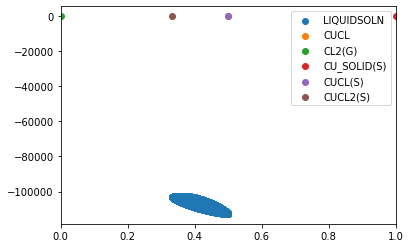

In [8]:
import matplotlib.pyplot as plt
from pycalphad import calculate
import numpy as np
z = 1e-15

for phase_name in ['LIQUIDSOLN', 'CUCL', 'CL2(G)', 'CU_SOLID(S)', 'CUCL(S)', 'CUCL2(S)']:
    if phase_name == 'LIQUIDSOLN':
        cr = calculate(dbf, comps, phase_name, T=800, N=1, P=101325, model=ModelMQMQA)
    else:
        cr = calculate(dbf, comps, phase_name, T=800, N=1, P=101325, model=Model)
    plt.scatter(cr.X.sel(component='CU').values.squeeze(), cr.GM.values.squeeze(), label=phase_name)
plt.xlim(0, 1)
plt.legend()